# Analyse Vina Docking Results

In [1]:
#conda install tabulate
from rdkit import Chem, RDConfig
from rdkit.Chem import rdSynthonSpaceSearch, rdFingerprintGenerator, Draw, PandasTools, AllChem, Crippen
from rdkit.Chem import rdMolDescriptors, rdFMCS, rdMolAlign
import rdkit.Chem.Descriptors as Descriptors
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Draw import rdMolDraw2D, rdDepictor
from IPython.display import SVG
from rdkit import rdBase
import matplotlib.pyplot as plt
import mols2grid
import pandas as pd
import sys, os
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

### Let's have a look at the docking results

In [2]:
vina = pd.read_csv("vina_summary.csv")
print(vina.shape)
vina.head(3)

(300, 5)


,ligand,best_affinity_kcal_per_mol,out_pdbqt,log_path,success
0,ligand_100,-9.905,vina_docking_output/ligand_100_out.pdbqt,vina_docking_output/ligand_100.log,True
1,ligand_1019,-9.102,vina_docking_output/ligand_1019_out.pdbqt,vina_docking_output/ligand_1019.log,True
2,ligand_1020,-8.452,vina_docking_output/ligand_1020_out.pdbqt,vina_docking_output/ligand_1020.log,True


In [3]:
#Extract ID from ligand column, remove 'ligand_' prefix
vina['ID'] = vina['ligand'].str.replace('ligand_', '').astype(int)
vina.head(3)

,ligand,best_affinity_kcal_per_mol,out_pdbqt,log_path,success,ID
0,ligand_100,-9.905,vina_docking_output/ligand_100_out.pdbqt,vina_docking_output/ligand_100.log,True,100
1,ligand_1019,-9.102,vina_docking_output/ligand_1019_out.pdbqt,vina_docking_output/ligand_1019.log,True,1019
2,ligand_1020,-8.452,vina_docking_output/ligand_1020_out.pdbqt,vina_docking_output/ligand_1020.log,True,1020


We see that the SMILES column is missing. Let's get that from `aligned_molecules.csv`

In [4]:
# Get the aligned molecules
align = pd.read_csv("data/aligned_molecules.csv")
align.head(3)

,SMILES,CatalogID,MW,LOGP,Rotating_bonds,HB_acceptors,HB_donors,fp_similarity,ID,mol_prepared,aligned_mol,RMSD
0,c1ccc(Nc2nc(N[C@H]3CC[C@H](Oc4cnccn4)CC3)nc3[n...,s_27____12806124____10803818,402.5,2.752762,6,8,3,0.808511,1261,<rdkit.Chem.rdchem.Mol object at 0x177746e30>,<rdkit.Chem.rdchem.Mol object at 0x1777e1850>,5.815457
1,c1ccc(Nc2nc(N[C@H]3C[C@@H](Oc4ccccc4)C3)nc3[nH...,s_27____12060302____10803818,372.4,3.558924,6,6,3,0.765957,1193,<rdkit.Chem.rdchem.Mol object at 0x177746a40>,<rdkit.Chem.rdchem.Mol object at 0x1777e2840>,4.923074
2,c1ccc(Nc2nc(NCCCOc3ccncc3)nc3[nH]cnc23)cc1,s_27____8925170____10803818,361.4,2.333283,8,7,3,0.765957,1366,<rdkit.Chem.rdchem.Mol object at 0x177746570>,<rdkit.Chem.rdchem.Mol object at 0x16a2d3600>,4.717695


In [5]:
#Concatenate Vina and aligned molecules dataframes on ID
df = pd.merge(vina, align, on='ID')
print(df.shape)
df.head(3)

(300, 17)


,ligand,best_affinity_kcal_per_mol,out_pdbqt,log_path,success,ID,SMILES,CatalogID,MW,LOGP,Rotating_bonds,HB_acceptors,HB_donors,fp_similarity,mol_prepared,aligned_mol,RMSD
0,ligand_100,-9.905,vina_docking_output/ligand_100_out.pdbqt,vina_docking_output/ligand_100.log,True,100,CC1CC(CCNc2nc(Nc3ccccc3)c3[nH]cnc3n2)CC(C)O1,s_27____9876646____10803818,366.5,3.468497,6,6,3,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777d2960>,<rdkit.Chem.rdchem.Mol object at 0x32f300ef0>,5.188125
1,ligand_1019,-9.102,vina_docking_output/ligand_1019_out.pdbqt,vina_docking_output/ligand_1019.log,True,1019,C[C@H]1COc2ccccc2[C@H]1Nc1nc(Nc2ccccc2)c2[nH]c...,s_27____19739048____10803818,372.4,3.841273,4,6,3,0.666667,<rdkit.Chem.rdchem.Mol object at 0x177722e30>,<rdkit.Chem.rdchem.Mol object at 0x1777c9e90>,5.236708
2,ligand_1020,-8.452,vina_docking_output/ligand_1020_out.pdbqt,vina_docking_output/ligand_1020.log,True,1020,c1ccc(Nc2nc(N3CCC[C@@H]3COc3ccccc3)nc3[nH]cnc2...,s_27____17551962____10803818,386.5,4.591826,6,6,2,0.734694,<rdkit.Chem.rdchem.Mol object at 0x1777200b0>,<rdkit.Chem.rdchem.Mol object at 0x1777e3510>,5.295482


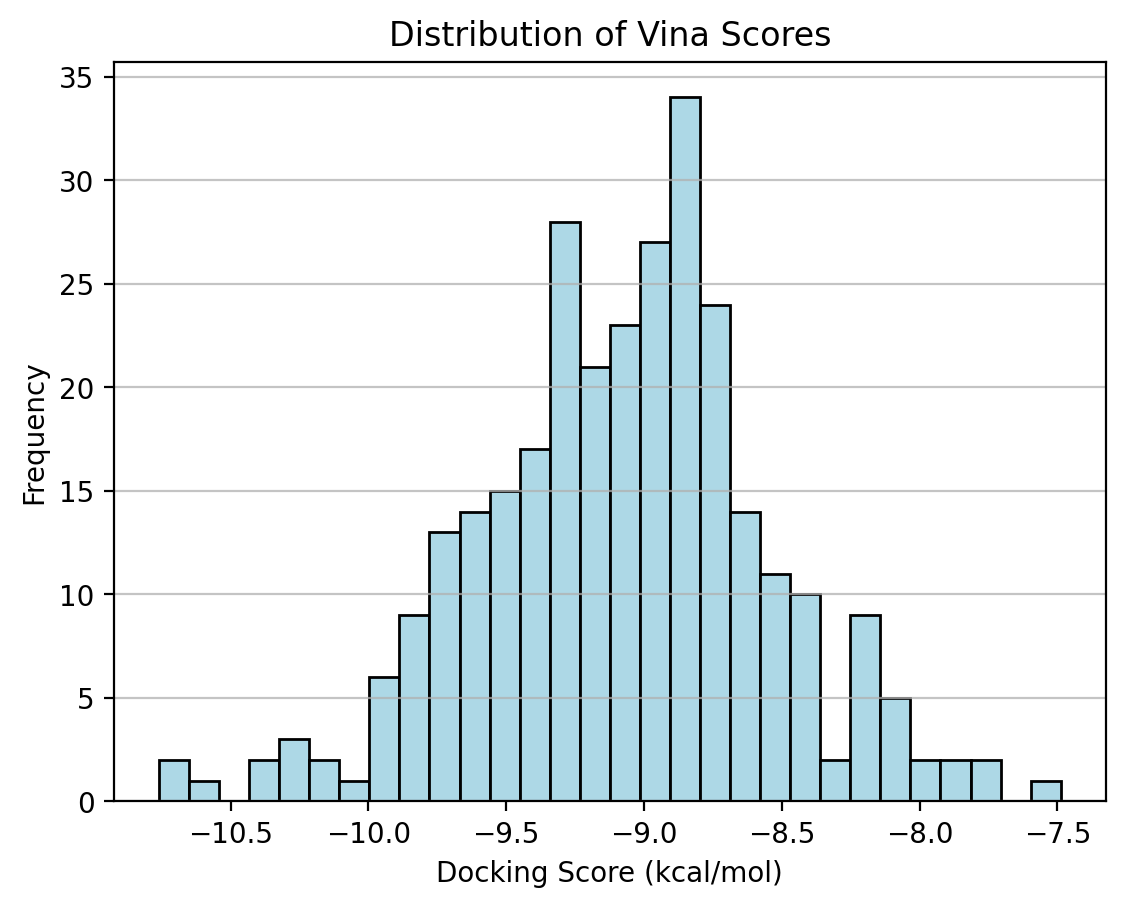

In [6]:
#docking histogram
plt.figure(dpi=200)
plt.hist(df['best_affinity_kcal_per_mol'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Vina Scores')
plt.xlabel('Docking Score (kcal/mol)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

It looks like we have sufficiently good molecules with docking scores.

But we have to determine only the best 5-10 candidates

## Properties to determine to identify best candidates

For this, we will consider the following criteria:

1) `docking score:` the better the merrier (better than approx -9 kcal/mol)

2) `clogP:` 0-3 is ideal

3) `Ligand Efficiency (LE)`: Higher the better, with >0.3 being the mark of a very efficient binder, 0.2-0.25 means the molecule is acceptable but could be improved, and < 0.20 being too inefficient.

4) `H-bond donors`: 0-3 will aid is cell penetration, absorption and CNS permeability. Anything above 3, and we start having issues of low cell permeability.


7) `Synthetic Accessibility (SA) score`: A score given between 1-10. < 6 is generally better for synthesisability

For `SA score`, we might not want to compute it, as all molecules came from the Enamine REAL library, and hence they already have high probability of synthesis.

We don't have LE computed in the above dataframe, so we will first do that.


### First we filter molecules based on their docking scores

In [7]:
#remove molecules with docking score worse than -9.0 kcal/mol
df = df[df['best_affinity_kcal_per_mol'] < -9.0]
print(f"Number of molecules with docking score better than -9.0 kcal/mol: {df.shape[0]}")
df.head(3)

Number of molecules with docking score better than -9.0 kcal/mol: 161


,ligand,best_affinity_kcal_per_mol,out_pdbqt,log_path,success,ID,SMILES,CatalogID,MW,LOGP,Rotating_bonds,HB_acceptors,HB_donors,fp_similarity,mol_prepared,aligned_mol,RMSD
0,ligand_100,-9.905,vina_docking_output/ligand_100_out.pdbqt,vina_docking_output/ligand_100.log,True,100,CC1CC(CCNc2nc(Nc3ccccc3)c3[nH]cnc3n2)CC(C)O1,s_27____9876646____10803818,366.5,3.468497,6,6,3,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777d2960>,<rdkit.Chem.rdchem.Mol object at 0x32f300ef0>,5.188125
1,ligand_1019,-9.102,vina_docking_output/ligand_1019_out.pdbqt,vina_docking_output/ligand_1019.log,True,1019,C[C@H]1COc2ccccc2[C@H]1Nc1nc(Nc2ccccc2)c2[nH]c...,s_27____19739048____10803818,372.4,3.841273,4,6,3,0.666667,<rdkit.Chem.rdchem.Mol object at 0x177722e30>,<rdkit.Chem.rdchem.Mol object at 0x1777c9e90>,5.236708
4,ligand_1027,-9.323,vina_docking_output/ligand_1027_out.pdbqt,vina_docking_output/ligand_1027.log,True,1027,c1ccc(Nc2nc(NCc3ccncc3OCC3CCOC3)nc3[nH]cnc23)cc1,s_27____10228314____10803818,417.5,2.214850,8,8,3,0.629630,<rdkit.Chem.rdchem.Mol object at 0x17778b990>,<rdkit.Chem.rdchem.Mol object at 0x1777cb290>,4.399108


Thus, we have removed close to half the molecules in the dataset

### Compute Ligand Efficiency (LE)

LE of a compound is simply docking score divided the number of heavy atoms

In [8]:
#make a new mol column from SMILES
df['mol'] = df['SMILES'].apply(Chem.MolFromSmiles)

In [9]:
def compute_ligand_efficiency(df, mol_col='mol', docking_col='docking_score'):
    """
    Compute Ligand Efficiency (LE) for each molecule in a DataFrame.
    
    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing at least a column with RDKit Mol objects and docking scores.
    mol_col : str, optional (default='mol')
        Column name containing RDKit Mol objects.
    docking_col : str, optional (default='docking_score')
        Column name containing docking scores (in kcal/mol; typically negative).
        
    Returns
    -------
    df : pandas.DataFrame
        Original DataFrame with a new column 'LE' added.
    """
    le_values = []
    for i, row in df.iterrows():
        mol = row[mol_col]
        docking_score = row[docking_col]

        if mol is None or not isinstance(mol, Chem.Mol):
            le_values.append(None)
            continue

        # Count heavy (non-hydrogen) atoms
        n_heavy = mol.GetNumHeavyAtoms()
        if n_heavy == 0 or docking_score is None:
            le_values.append(None)
            continue

        # LE = –DockingScore / N_heavy
        le = -docking_score / n_heavy
        le_values.append(round(le, 3))

    df['LE'] = le_values
    return df


In [10]:
# Compute ligand efficiency
df_le = compute_ligand_efficiency(df, mol_col='mol', docking_col='best_affinity_kcal_per_mol')
df_le.head(3)

,ligand,best_affinity_kcal_per_mol,out_pdbqt,log_path,success,ID,SMILES,CatalogID,MW,LOGP,Rotating_bonds,HB_acceptors,HB_donors,fp_similarity,mol_prepared,aligned_mol,RMSD,mol,LE
0,ligand_100,-9.905,vina_docking_output/ligand_100_out.pdbqt,vina_docking_output/ligand_100.log,True,100,CC1CC(CCNc2nc(Nc3ccccc3)c3[nH]cnc3n2)CC(C)O1,s_27____9876646____10803818,366.5,3.468497,6,6,3,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777d2960>,<rdkit.Chem.rdchem.Mol object at 0x32f300ef0>,5.188125,<rdkit.Chem.rdchem.Mol object at 0x16290d230>,0.367
1,ligand_1019,-9.102,vina_docking_output/ligand_1019_out.pdbqt,vina_docking_output/ligand_1019.log,True,1019,C[C@H]1COc2ccccc2[C@H]1Nc1nc(Nc2ccccc2)c2[nH]c...,s_27____19739048____10803818,372.4,3.841273,4,6,3,0.666667,<rdkit.Chem.rdchem.Mol object at 0x177722e30>,<rdkit.Chem.rdchem.Mol object at 0x1777c9e90>,5.236708,<rdkit.Chem.rdchem.Mol object at 0x16290d150>,0.325
4,ligand_1027,-9.323,vina_docking_output/ligand_1027_out.pdbqt,vina_docking_output/ligand_1027.log,True,1027,c1ccc(Nc2nc(NCc3ccncc3OCC3CCOC3)nc3[nH]cnc23)cc1,s_27____10228314____10803818,417.5,2.214850,8,8,3,0.629630,<rdkit.Chem.rdchem.Mol object at 0x17778b990>,<rdkit.Chem.rdchem.Mol object at 0x1777cb290>,4.399108,<rdkit.Chem.rdchem.Mol object at 0x16290d000>,0.301


<Axes: >

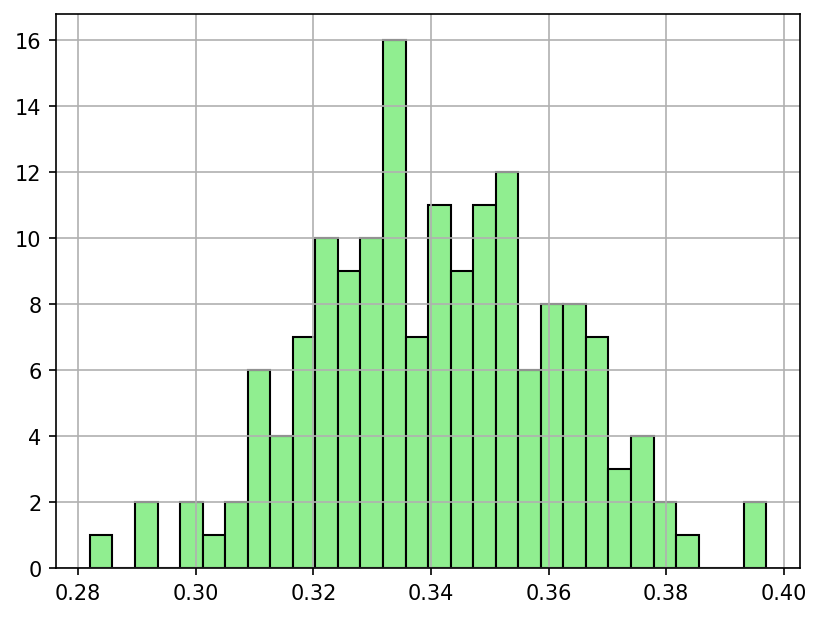

In [11]:
plt.figure(dpi=150)
df_le.LE.hist(bins=30, color='lightgreen', edgecolor='black')

A mojority of molecule have LE > 0.3 kcal/mol per heavy atom.

We will need some additional criteria to reduce the number of molecules for synthesis

### Check molecules with both good LE and logP values

In [12]:
le_threshold = 0.3 #we want LE >= 0.3
logp_lower = 1 #minimum logP
logp_upper = 3 #maximum logP

good_le = df_le[df_le['LE'] >= le_threshold]
good_logp = df_le[(df_le['LOGP'] >= logp_lower) & (df_le['LOGP'] <= logp_upper)]

print(f"Number of molecules with LE >= {le_threshold}: {good_le.shape[0]}")
print(f"Number of molecules with logP between {logp_lower} and {logp_upper}: {good_logp.shape[0]}")

Number of molecules with LE >= 0.3: 158
Number of molecules with logP between 1 and 3: 29


In [13]:
# Check how many molecules have LE better than 0.3 and logP 1-3 and HB_donors all at the same time
candidates = good_le[(good_le['LOGP'] >= logp_lower) & (good_le['LOGP'] <= logp_upper)]
print(f"Number of molecules with LE >= {le_threshold} and logP between {logp_lower} and {logp_upper}: {candidates.shape[0]}")
candidates.head(10)

Number of molecules with LE >= 0.3 and logP between 1 and 3: 29


,ligand,best_affinity_kcal_per_mol,out_pdbqt,log_path,success,ID,SMILES,CatalogID,MW,LOGP,Rotating_bonds,HB_acceptors,HB_donors,fp_similarity,mol_prepared,aligned_mol,RMSD,mol,LE
4,ligand_1027,-9.323,vina_docking_output/ligand_1027_out.pdbqt,vina_docking_output/ligand_1027.log,True,1027,c1ccc(Nc2nc(NCc3ccncc3OCC3CCOC3)nc3[nH]cnc23)cc1,s_27____10228314____10803818,417.5,2.214850,8,8,3,0.629630,<rdkit.Chem.rdchem.Mol object at 0x17778b990>,<rdkit.Chem.rdchem.Mol object at 0x1777cb290>,4.399108,<rdkit.Chem.rdchem.Mol object at 0x16290d000>,0.301
12,ligand_108,-9.383,vina_docking_output/ligand_108_out.pdbqt,vina_docking_output/ligand_108.log,True,108,O[C@H]1[C@H](Nc2nc(Nc3ccccc3)c3[nH]cnc3n2)COC1...,m_27____21000918____10803818,352.4,1.891779,4,7,4,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777d23b0>,<rdkit.Chem.rdchem.Mol object at 0x32f300ae0>,5.055766,<rdkit.Chem.rdchem.Mol object at 0x16290d460>,0.361
16,ligand_1104,-10.290,vina_docking_output/ligand_1104_out.pdbqt,vina_docking_output/ligand_1104.log,True,1104,OC1(CNc2nc(Nc3ccccc3)c3[nH]cnc3n2)CC2CCCC21,s_27____25523918____10803818,350.4,2.623580,5,6,4,0.638298,<rdkit.Chem.rdchem.Mol object at 0x177789000>,<rdkit.Chem.rdchem.Mol object at 0x1777cb4c0>,5.272035,<rdkit.Chem.rdchem.Mol object at 0x16290d540>,0.396
29,ligand_1175,-9.939,vina_docking_output/ligand_1175_out.pdbqt,vina_docking_output/ligand_1175.log,True,1175,OC[C@@H]1C[C@H]2CCC[C@]1(Nc1nc(Nc3ccccc3)c3[nH...,s_27____25557460____10803818,364.5,2.797891,5,6,4,0.638298,<rdkit.Chem.rdchem.Mol object at 0x17778b140>,<rdkit.Chem.rdchem.Mol object at 0x1777b4950>,5.486872,<rdkit.Chem.rdchem.Mol object at 0x16290da10>,0.368
33,ligand_1181,-9.244,vina_docking_output/ligand_1181_out.pdbqt,vina_docking_output/ligand_1181.log,True,1181,CC(O)C1CCC(Nc2nc(Nc3ccccc3)c3[nH]cnc3n2)CC1,s_27____25524800____10803818,352.4,2.991085,5,6,4,0.638298,<rdkit.Chem.rdchem.Mol object at 0x17778ac00>,<rdkit.Chem.rdchem.Mol object at 0x1777b4590>,5.349954,<rdkit.Chem.rdchem.Mol object at 0x16290d7e0>,0.356
34,ligand_1182,-9.189,vina_docking_output/ligand_1182_out.pdbqt,vina_docking_output/ligand_1182.log,True,1182,CC1COCC(CCNc2nc(Nc3ccccc3)c3[nH]cnc3n2)O1,s_27____25523224____10803818,354.4,2.117772,6,7,3,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777d22d0>,<rdkit.Chem.rdchem.Mol object at 0x32f300900>,4.685655,<rdkit.Chem.rdchem.Mol object at 0x16290d850>,0.353
35,ligand_1192,-9.552,vina_docking_output/ligand_1192_out.pdbqt,vina_docking_output/ligand_1192.log,True,1192,CN1CCC(C(C)(O)CNc2nc(Nc3ccccc3)c3[nH]cnc3n2)CC1,s_27____25525338____10803818,381.5,1.984594,6,7,4,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777d2490>,<rdkit.Chem.rdchem.Mol object at 0x32f300c70>,4.832834,<rdkit.Chem.rdchem.Mol object at 0x16290d690>,0.341
45,ligand_1217,-9.127,vina_docking_output/ligand_1217_out.pdbqt,vina_docking_output/ligand_1217.log,True,1217,COC(C)(CNc1nc(Nc2ccccc2)c2[nH]cnc2n1)C1CCOCC1,s_27____20762476____10803818,382.5,2.562101,7,7,3,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777d2ce0>,<rdkit.Chem.rdchem.Mol object at 0x32f3010d0>,4.864839,<rdkit.Chem.rdchem.Mol object at 0x16290f920>,0.326
51,ligand_1261,-9.254,vina_docking_output/ligand_1261_out.pdbqt,vina_docking_output/ligand_1261.log,True,1261,c1ccc(Nc2nc(N[C@H]3CC[C@H](Oc4cnccn4)CC3)nc3[n...,s_27____12806124____10803818,402.5,2.752762,6,8,3,0.808511,<rdkit.Chem.rdchem.Mol object at 0x177746e30>,<rdkit.Chem.rdchem.Mol object at 0x1777e1850>,5.815457,<rdkit.Chem.rdchem.Mol object at 0x16290fa00>,0.308
68,ligand_1400,-9.075,vina_docking_output/ligand_1400_out.pdbqt,vina_docking_output/ligand_1400.log,True,1400,Clc1cncc(OCCCNc2nc(Nc3ccccc3)c3[nH]cnc3n2)n1,s_27____25541468____10803818,396.8,2.534290,8,8,3,0.716981,<rdkit.Chem.rdchem.Mol object at 0x177720a50>,<rdkit.Chem.rdchem.Mol object at 0x17774b7e0>,5.249154,<rdkit.Chem.rdchem.Mol object at 0x162b78200>,0.324


#### As mentioned above in the criteria we are looking for,

we will check for number of hydrogen bond donors: 0–2 usually aid in intestinal absorption, cell penetration and CNS permeability.

In [14]:
#candidates that have HB_donors between 0-3
final_candidates = candidates[(candidates['HB_donors'] >= 0) & (candidates['HB_donors'] <= 3)]
print(f"Number of molecules with LE >= {le_threshold}, logP between {logp_lower} and {logp_upper}, and HB_donors between 0-3: {final_candidates.shape[0]}")
final_candidates.head(10)

Number of molecules with LE >= 0.3, logP between 1 and 3, and HB_donors between 0-3: 16


,ligand,best_affinity_kcal_per_mol,out_pdbqt,log_path,success,ID,SMILES,CatalogID,MW,LOGP,Rotating_bonds,HB_acceptors,HB_donors,fp_similarity,mol_prepared,aligned_mol,RMSD,mol,LE
4,ligand_1027,-9.323,vina_docking_output/ligand_1027_out.pdbqt,vina_docking_output/ligand_1027.log,True,1027,c1ccc(Nc2nc(NCc3ccncc3OCC3CCOC3)nc3[nH]cnc23)cc1,s_27____10228314____10803818,417.5,2.214850,8,8,3,0.629630,<rdkit.Chem.rdchem.Mol object at 0x17778b990>,<rdkit.Chem.rdchem.Mol object at 0x1777cb290>,4.399108,<rdkit.Chem.rdchem.Mol object at 0x16290d000>,0.301
34,ligand_1182,-9.189,vina_docking_output/ligand_1182_out.pdbqt,vina_docking_output/ligand_1182.log,True,1182,CC1COCC(CCNc2nc(Nc3ccccc3)c3[nH]cnc3n2)O1,s_27____25523224____10803818,354.4,2.117772,6,7,3,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777d22d0>,<rdkit.Chem.rdchem.Mol object at 0x32f300900>,4.685655,<rdkit.Chem.rdchem.Mol object at 0x16290d850>,0.353
45,ligand_1217,-9.127,vina_docking_output/ligand_1217_out.pdbqt,vina_docking_output/ligand_1217.log,True,1217,COC(C)(CNc1nc(Nc2ccccc2)c2[nH]cnc2n1)C1CCOCC1,s_27____20762476____10803818,382.5,2.562101,7,7,3,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777d2ce0>,<rdkit.Chem.rdchem.Mol object at 0x32f3010d0>,4.864839,<rdkit.Chem.rdchem.Mol object at 0x16290f920>,0.326
51,ligand_1261,-9.254,vina_docking_output/ligand_1261_out.pdbqt,vina_docking_output/ligand_1261.log,True,1261,c1ccc(Nc2nc(N[C@H]3CC[C@H](Oc4cnccn4)CC3)nc3[n...,s_27____12806124____10803818,402.5,2.752762,6,8,3,0.808511,<rdkit.Chem.rdchem.Mol object at 0x177746e30>,<rdkit.Chem.rdchem.Mol object at 0x1777e1850>,5.815457,<rdkit.Chem.rdchem.Mol object at 0x16290fa00>,0.308
68,ligand_1400,-9.075,vina_docking_output/ligand_1400_out.pdbqt,vina_docking_output/ligand_1400.log,True,1400,Clc1cncc(OCCCNc2nc(Nc3ccccc3)c3[nH]cnc3n2)n1,s_27____25541468____10803818,396.8,2.534290,8,8,3,0.716981,<rdkit.Chem.rdchem.Mol object at 0x177720a50>,<rdkit.Chem.rdchem.Mol object at 0x17774b7e0>,5.249154,<rdkit.Chem.rdchem.Mol object at 0x162b78200>,0.324
81,ligand_226,-9.016,vina_docking_output/ligand_226_out.pdbqt,vina_docking_output/ligand_226.log,True,226,COc1cc(OC)c(CCNc2nc(Nc3ccccc3)c3[nH]cnc3n2)cn1,s_27____16908938____10803818,391.4,2.921523,8,8,3,0.653846,<rdkit.Chem.rdchem.Mol object at 0x177788040>,<rdkit.Chem.rdchem.Mol object at 0x1777ca250>,5.047582,<rdkit.Chem.rdchem.Mol object at 0x162b784a0>,0.311
95,ligand_286,-9.425,vina_docking_output/ligand_286_out.pdbqt,vina_docking_output/ligand_286.log,True,286,c1ccc(Nc2nc(NCC3CCOC34CCOCC4)nc3[nH]cnc23)cc1,s_27____25521308____10803818,380.5,1.750675,5,7,3,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777a92a0>,<rdkit.Chem.rdchem.Mol object at 0x1777b5c10>,5.091221,<rdkit.Chem.rdchem.Mol object at 0x162b78970>,0.337
108,ligand_323,-9.424,vina_docking_output/ligand_323_out.pdbqt,vina_docking_output/ligand_323.log,True,323,c1ccc(Nc2nc(NC[C@H]3C[C@H]4COC[C@@H](C3)C4)nc3...,m_27____25523998____10803818,364.5,2.979521,5,6,3,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777d0200>,<rdkit.Chem.rdchem.Mol object at 0x1777b7790>,5.090652,<rdkit.Chem.rdchem.Mol object at 0x162b78cf0>,0.349
129,ligand_393,-9.248,vina_docking_output/ligand_393_out.pdbqt,vina_docking_output/ligand_393.log,True,393,CCC12CCC(Nc3nc(Nc4ccccc4)c4[nH]cnc4n3)(CO1)C2,m_27____19140552____10803818,350.4,2.940604,5,6,3,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777aaff0>,<rdkit.Chem.rdchem.Mol object at 0x1777b6a70>,5.316237,<rdkit.Chem.rdchem.Mol object at 0x162b79230>,0.356
147,ligand_452,-9.554,vina_docking_output/ligand_452_out.pdbqt,vina_docking_output/ligand_452.log,True,452,CC12CCC(Nc3nc(Nc4ccccc4)c4[nH]cnc4n3)(CC1)CO2,m_27____25557544____10803818,350.4,2.935445,4,6,3,0.612245,<rdkit.Chem.rdchem.Mol object at 0x1777d1460>,<rdkit.Chem.rdchem.Mol object at 0x1777b7ec0>,4.981820,<rdkit.Chem.rdchem.Mol object at 0x162b79620>,0.367


## Ranked list of candidates

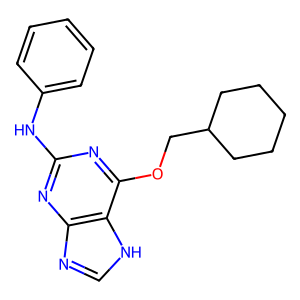

In [15]:
# Revisit the query molecule in PDB ID: 1H1Q
query = Chem.MolFromSmiles("C1=CC=C(NC2=NC3=C(NC=N3)C(OCC3CCCCC3)=N2)C=C1")
Chem.SanitizeMol(query)
Draw.MolToImage(query)

In [16]:
mols2grid.display(final_candidates, mol_col='mol', smiles_col='SMILES',
                  subset=['ID', 'img','best_affinity_kcal_per_mol', 'LE', 'LOGP', 'HB_donors'],
                  size=(200,200), prerender=True)

MolGridWidget()

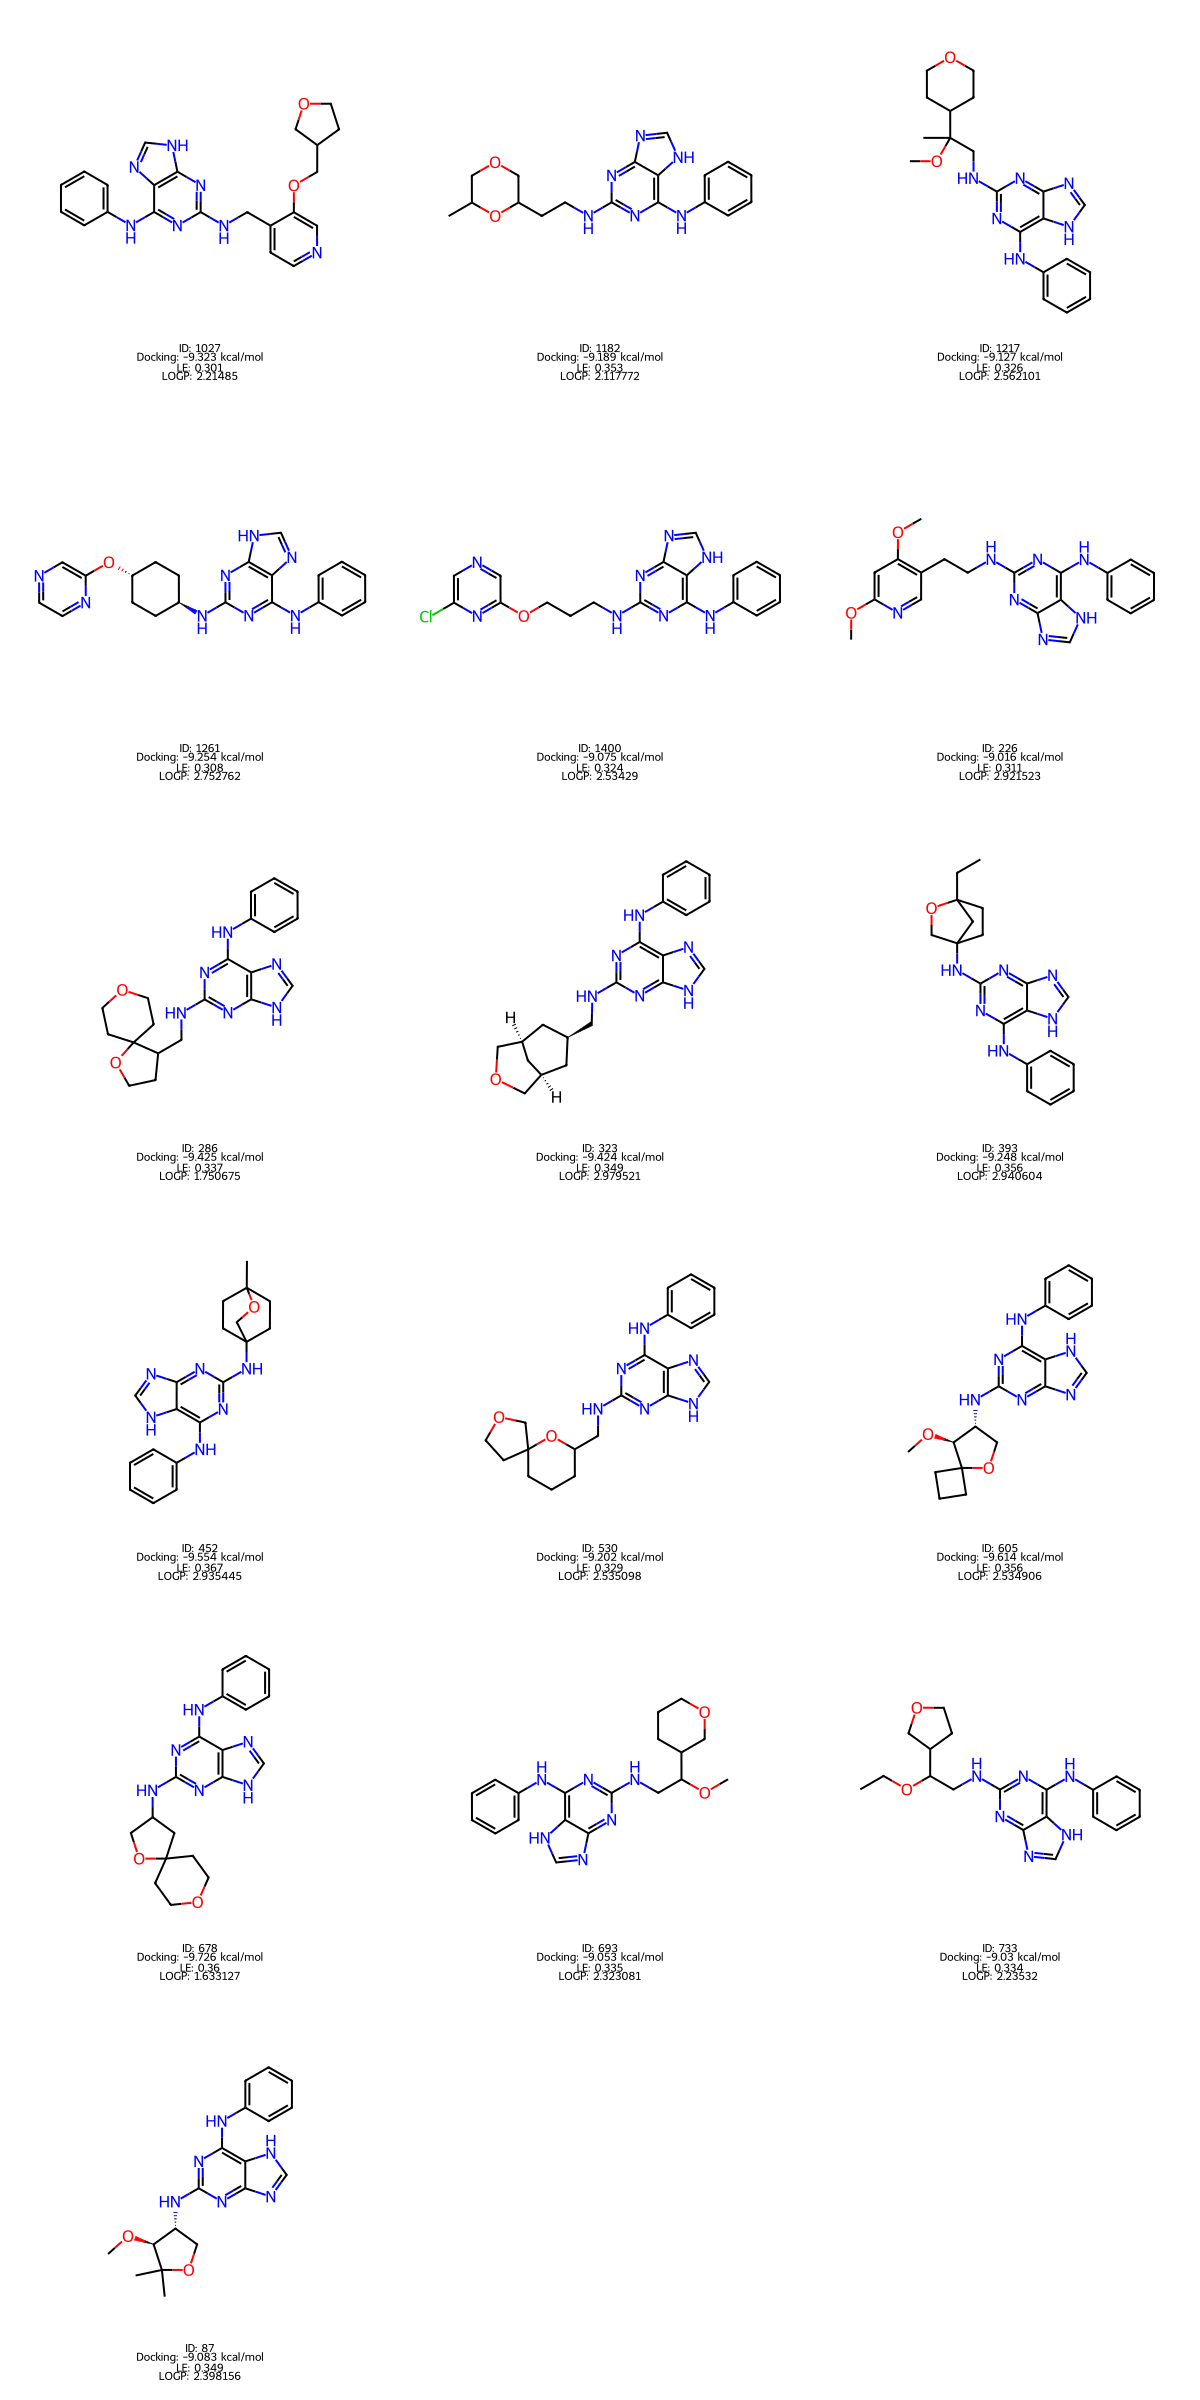

In [17]:
#Sometime mols2grid does not show images properly. Hence, here are the molecules shown using Draw.MolToImage
Draw.MolsToGridImage(final_candidates['mol'].tolist(),
                     legends=[f"ID: {row.ID}\nDocking: {row.best_affinity_kcal_per_mol} kcal/mol\nLE: {row.LE}\nLOGP: {row.LOGP}" for index, row in final_candidates.iterrows()],
                     molsPerRow=3, subImgSize=(400,400))

# What could be improved further?

1) `Ligand alignment:` The process of ligand alignment from Notebook `1_PurchasableCompounds.ipynb` seems to have given molecules not properly aligned to the co-ligand in PDB ID: 1H1Q. As a result, the poses from docking appear to be not up to expectations, resulting in unreliable docking scores. Towards this, I would use a better docking alignment method, and try out some out docking software for this purpose.

2) `Strain energy:` I would compute strain energies of all docked poses and the co-ligand from 1H1Q. Calculating the strain energy of a docked molecule is an important step in assessing the quality and realism of a docking pose. High strain energy in a ligand conformation can indicate an unfavorable binding pose, even if the docking score is good, as the ligand might be forced into an energetically costly shape to fit the binding site. I will keep docking results of only those molecules that show better strain energies than that of the co-ligand.

3) `More rigorous/flexible docking`: I would consider using docking algorithms that sample rotamers of pocket amino acids when ligands are docked, mimicking the `induced-fit` of ligand binding.

4) `logD`: I would consider using logD as a more appropriate description of lipophilicity than the clogD currently used in this exercise. This is because for compounds with ionizable groups, the distribution of species is impacted by pH. The ionization state of a molecule can impact its lipophilicity, and logD is a better predictor of lipophilicity for such compounds.

5) `pdbfixer`: Lastly, I would add a pdbfixer function to the `2_PrepareProtein.ipynb` notebook for automating protein preparation.

6) `ADMET evaluation?`: I thought of evaluating compounds based on their predicted ADMET properties, but decided not to do so for two reasons:

- In the initial stages of hit ID, potency, selectivity and lipophilicity matter the most and these are what should be controlled. This is because lipophilicity often acts as a proxy for various ADMET properties such as solubility, bioavailability, clearance, cell permeability, toxicity, etc. Maintaining a balanced lipophilicity at this stage usually balances such ADMET properties at best.

- Optimising ADMET is of more concern during the lead optimisation phases of drug design, when potency, selectivity and lipophilicity have already been optimised.

7) `Structural filters and alerts`: I would use verious medchem filters such as PAINS, NIBR filters, Eli lilly medchem filters, etc to filter and select top 300 molecules from the initial list of downloaded molecules from the Enamine store. But from visual observations, the compounds already looked quite promising from the medchem perspective, and hence decided not to do it.

# Summary Table

We create a summary table based on aforementioned computed properties

In [18]:
sum_table = final_candidates[['ID','SMILES','CatalogID','best_affinity_kcal_per_mol','LE','LOGP','HB_donors','MW']]
print(sum_table.to_markdown())

|     |   ID | SMILES                                                      | CatalogID                    |   best_affinity_kcal_per_mol |    LE |    LOGP |   HB_donors |    MW |
|----:|-----:|:------------------------------------------------------------|:-----------------------------|-----------------------------:|------:|--------:|------------:|------:|
|   4 | 1027 | c1ccc(Nc2nc(NCc3ccncc3OCC3CCOC3)nc3[nH]cnc23)cc1            | s_27____10228314____10803818 |                       -9.323 | 0.301 | 2.21485 |           3 | 417.5 |
|  34 | 1182 | CC1COCC(CCNc2nc(Nc3ccccc3)c3[nH]cnc3n2)O1                   | s_27____25523224____10803818 |                       -9.189 | 0.353 | 2.11777 |           3 | 354.4 |
|  45 | 1217 | COC(C)(CNc1nc(Nc2ccccc2)c2[nH]cnc2n1)C1CCOCC1               | s_27____20762476____10803818 |                       -9.127 | 0.326 | 2.5621  |           3 | 382.5 |
|  51 | 1261 | c1ccc(Nc2nc(N[C@H]3CC[C@H](Oc4cnccn4)CC3)nc3[nH]cnc23)cc1   | s_27____12806124____10803818

In [19]:
#sum_table.to_csv("summaries/final_candidates_summary_table.csv", index=False)

# Statistical Summary Table

In [20]:
stat_summary_table = sum_table.describe()
print(stat_summary_table.to_markdown())

|       |       ID |   best_affinity_kcal_per_mol |         LE |      LOGP |   HB_donors |       MW |
|:------|---------:|-----------------------------:|-----------:|----------:|------------:|---------:|
| count |   16     |                     16       | 16         | 16        |          16 |  16      |
| mean  |  693.312 |                     -9.27144 |  0.337187  |  2.46058  |           3 | 374.712  |
| std   |  409.863 |                      0.22091 |  0.0197896 |  0.407428 |           0 |  19.7086 |
| min   |   87     |                     -9.726   |  0.301     |  1.63313  |           3 | 350.4    |
| 25%   |  375.5   |                     -9.42425 |  0.3255    |  2.2302   |           3 | 361.975  |
| 50%   |  641.5   |                     -9.225   |  0.336     |  2.5346   |           3 | 368.4    |
| 75%   | 1065.75  |                     -9.081   |  0.35375   |  2.79495  |           3 | 384.725  |
| max   | 1400     |                     -9.016   |  0.367     |  2.97952  |      

In [21]:
#stat_summary_table.to_csv("summaries/final_candidates_STATISTICAL_summary_table.csv")

# Post-docking methods for more accurate binding free energy scores

- Make a short list of some ways and the steps to obtain them; include links to 
relevant packages

| Method | Short Description | Tools-Package Links |
|-----------|-----------|-----------|
| MM-GBSA / MM-PBSA | Estimates binding free energy by combining molecular mechanics energies with implicit solvent models (GB = Generalized Born, PB = Poisson–Boltzmann). | [GROMACS + gmx_MMPBSA](https://valdes-tresanco-ms.github.io/gmx_MMPBSA/dev/) |
| ANI-2x LIE method | A new tool based on ANI-ML potentials applied on MD trajectories aiming to perform end-state free energy calculations. | [ANI_LIE Github](https://github.com/otayfuroglu/deepQM) |
| Alchemical FEP | Computes relative or absolute ΔG<sub>bind</sub> by sampling intermediate “alchemical” states — the most accurate physics-based approach. | [openfe Github](https://github.com/OpenFreeEnergy/openfe), [ABFE tutorial](https://github.com/OpenFreeEnergy/ExampleNotebooks/tree/main/abfe_tutorial), [RBFE tutorial](https://docs.openfree.energy/en/stable/tutorials/rbfe_python_tutorial.html) |
| Alchemical FEP | Description same as above | [OpenBioSim](https://www.openbiosim.org/alchemical-with-bss/) |

# Next experimental steps

- What would be the next experimental steps, and what types of results would you 
look for?

### 1. Physicochemical profiling (quick, low-cost checks)

`Steps / assays`

- Aqueous solubility (kinetic and/or thermodynamic).

- Experimental logD (pH 7.4) or logP.

- pKa estimation (if ionizable).

`What to look for`

- Solubility > 100 µM (depending on assay) is often most desirable.

- logD consistent with design (avoid very high >4–5 unless intended).

### 2. Primary biochemical assay (direct potency)

`Steps`

- Run the biochemical (enzyme or binding) assay to measure potency (IC₅₀, Kᵢ) at multiple concentrations to generate dose–response curves. Use appropriate positive/negative controls.

`What to look for`

- Clean sigmoidal dose–response, reproducible IC₅₀ or Kd.

- Potency thresholds depend on project stage (e.g., IC₅₀ < 1 µM is often a good early hit ID).

### 3. Cell-based assays

`Steps`

- Test cellular activity (EC₅₀) in relevant cell lines.

- Check cytotoxicity (CC₅₀) and calculate therapeutic window (CC₅₀ / EC₅₀).

- Optional: cellular target engagement (BRET, CETSA, NanoBRET).

`What to look for`

- Cellular activity at reasonable concentrations (close to biochemical potency — if there’s a big drop, investigate permeability/efflux/compound instability).

- Low cytotoxicity at active concentrations.

### 4. Selectivity profile: Run a kinase panel screen

`Steps and what to look for`
-  Once a promising hit is identified, it is wise to run a kinase panel assay to understand a molecule's selectivity profile. These panel assays will typically assess the binding of a molecule to more than 300 representative kinases. The results of these assays, which are often visualized on a tree view of the kinome, estimate the selectivity optimization challenges facing a team. By combining the results of a kinase panel assay with experimental or predicted protein structures, a team can sometimes formulate strategies to avoid kinases whose inhibition would produce undesired side effects.

### 5. Early ADME profiling

Early ADME profiling (inform go/no-go)

`Steps`

- Metabolic stability (human/rodent liver microsomes or hepatocytes).

- Permeability: PAMPA and/or Caco-2.

- Efflux Ratio (ER).

- Plasma protein binding (PPB).

- hERG liability (early cardiac risk screen).

`What to look for`

- Microsomal intrinsic clearance that is moderate. A moderate clearance of 10-100 ml/min/kg, is desired.

- Permeability adequate for intended route (passive permeability or good transport). For Caco-2, anything above 8*10<sup>-6</sup> is ideally desired.

- An ER <2 indicates that the molecule isn't a p-lycoprotein (PgP) substrate.

- PPB moderate (very high PPB can reduce free drug).

- hERG inhibition minimal (<10 µM or safe margin relative to potency).

`Decision cues`

- If metabolic clearance is too high or permeability too low, deprioritize or redesign.

